In [30]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [34]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

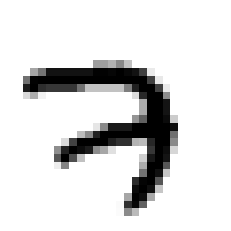

In [35]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

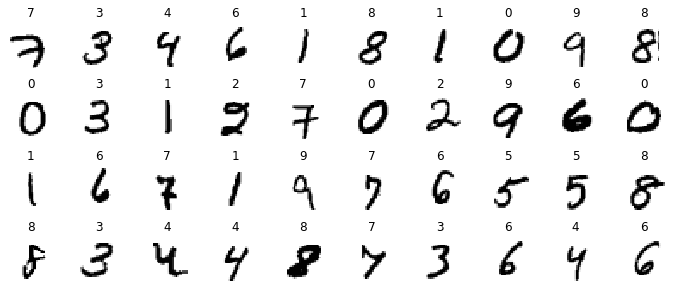

In [36]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [37]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [39]:
import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:00<00:00,  3.79 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:00<00:00,  6.97 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:01<00:00,  3.04 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:01<00:00,  2.69 url/s]
                                                                        

Dataset mnist downloaded and prepared to C:\Users\p1\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [40]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [41]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [42]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 2s 2ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.1978 - val_sparse_categorical_accuracy: 0.9419
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1665 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.1393 - val_sparse_categorical_accuracy: 0.9580
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.1092 - val_sparse_categorical_accuracy: 0.9675
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0916 - sparse_categorical_accuracy: 0.9740 - val_loss: 0.0956 - val_sparse_categorical_accuracy: 0.9720
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0743 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.0858 - val_sparse_categorical_accuracy: 0.9739
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0610 - sparse_categorical_accu

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[-3.300e+00, -8.700e+00, -8.000e-02,  2.980e+00, -8.290e+00,
        -5.450e+00, -1.162e+01,  9.520e+00, -2.170e+00, -1.600e+00],
       [-6.600e-01,  4.710e+00,  1.247e+01,  3.220e+00, -1.161e+01,
        -1.000e-02, -3.780e+00, -8.620e+00, -1.490e+00, -1.138e+01],
       [-4.960e+00,  5.800e+00, -2.300e-01, -2.990e+00, -1.710e+00,
        -3.140e+00, -4.010e+00,  3.700e-01, -1.150e+00, -4.990e+00]],
      dtype=float32)

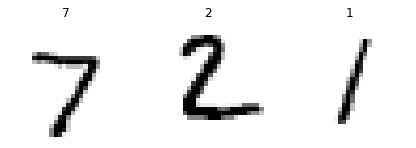

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()